## CS 773 - Course Project
#### Dániel Bence Papp
#### 07/22/2023

# Imports

In [389]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [390]:
data = pd.read_csv('airline_passenger_satisfaction-2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [391]:
DATA_SIZE = data.shape[0]
MAIN_FEATURES = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

In [392]:
data['Arrival Delay'].fillna(np.mean(data['Arrival Delay']), inplace=True)

# Question 1

In [393]:
data[['Departure Delay', 'Arrival Delay']].describe()

,Departure Delay,Arrival Delay
count,129880.000000,129880.000000
mean,14.713713,15.091129
std,38.071126,38.407410
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [394]:
data[['Departure Delay', 'Arrival Delay']].mode()

,Departure Delay,Arrival Delay
0,0,0.0


In [395]:
data[['Departure Delay', 'Arrival Delay']].median()

Departure Delay    0.0
Arrival Delay      0.0
dtype: float64

In [396]:
data[['Departure Delay', 'Arrival Delay']].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

,Departure Delay,Arrival Delay
0.10,0.0,0.0
0.25,0.0,0.0
0.50,0.0,0.0
0.75,12.0,13.0
0.90,44.0,44.0


In [397]:
data[['Departure Delay', 'Arrival Delay']].skew()

Departure Delay    6.821980
Arrival Delay      6.680239
dtype: float64

In [398]:
data[['Departure Delay', 'Arrival Delay']].cov()

,Departure Delay,Arrival Delay
Departure Delay,1449.410651,1404.206439
Arrival Delay,1404.206439,1475.129118


In [399]:
data[['Departure Delay', 'Arrival Delay']].corr('pearson')

,Departure Delay,Arrival Delay
Departure Delay,1.000000,0.960329
Arrival Delay,0.960329,1.000000


array([[<Axes: title={'center': 'Departure Delay'}>,
        <Axes: title={'center': 'Arrival Delay'}>]], dtype=object)

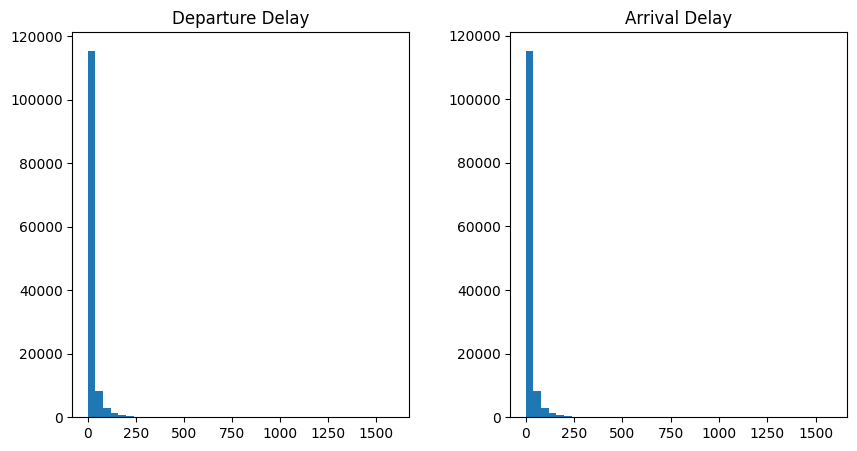

In [400]:
data[['Departure Delay', 'Arrival Delay']].hist(bins=40, figsize=(10, 5), grid=False)

In [401]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Question 2
## Discretization of nominal features

Discretize age (A3) to nominal values using the following criteria: 0-15: Child; 16-35: Youth; 36-55 Middle age; 56-70: Old; >70- Senior

Discretize flight distance (A7) to nominal values using the following criteria: 0-500 miles: Short haul; 501-3000 miles: Medium haul; >3000 Long haul

Discretize delays (A8 and A9) to nominal values: Small: 0-15; Medium: 16-45; Long: > 45

In [402]:
# discretize the satisfaction column to 0 and 1
# 0 = neutral or dissatisfied
# 1 = satisfied
# correlation between in-flight service and satisfaction for long-haul flights only

data['d_Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

data['d_Age'] = pd.cut(data['Age'], bins=[0, 15, 35, 55, 70, 100], labels=['Child', 'Youth', 'Middle Age', 'Old', 'Senior'])

data['d_Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 3000, 10000], labels=['Short Haul', 'Medium Haul','Long Haul'])

data['d_Arrival Delay'] = pd.cut(data['Arrival Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

data['d_Departure Delay'] = pd.cut(data['Departure Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

In [403]:
data.head(20)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,d_Satisfaction,d_Age,d_Flight Distance,d_Arrival Delay,d_Departure Delay
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,3,5,5,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,2,5,5,Satisfied,1,Youth,Medium Haul,Medium,Medium
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,4,3,3,Satisfied,1,Middle Age,Medium Haul,Small,Small
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,3,3,3,Satisfied,1,Middle Age,Long Haul,Small,Small
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,4,Satisfied,1,Middle Age,Long Haul,Small,Small
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,3,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,3,3,Satisfied,1,Old,Medium Haul,Small,Small
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,4,4,4,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small


# Question 3

In [404]:
# correlation between in-flight service and satisfaction for long-haul flights only which are over 3000 miles

df = data[data['Flight Distance'] > 3000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10313 entries, 4 to 129855
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ID                                      10313 non-null  int64   
 1   Gender                                  10313 non-null  object  
 2   Age                                     10313 non-null  int64   
 3   Customer Type                           10313 non-null  object  
 4   Type of Travel                          10313 non-null  object  
 5   Class                                   10313 non-null  object  
 6   Flight Distance                         10313 non-null  int64   
 7   Departure Delay                         10313 non-null  int64   
 8   Arrival Delay                           10313 non-null  float64 
 9   Departure and Arrival Time Convenience  10313 non-null  int64   
 10  Ease of Online Booking                  10313 non-

In [405]:
df[['In-flight Service', 'd_Satisfaction']].corr('pearson')

,In-flight Service,d_Satisfaction
In-flight Service,1.000000,0.519821
d_Satisfaction,0.519821,1.000000


In [406]:
df[['Departure Delay', 'd_Satisfaction']].corr('pearson')

,Departure Delay,d_Satisfaction
Departure Delay,1.000000,-0.081885
d_Satisfaction,-0.081885,1.000000


<Axes: >

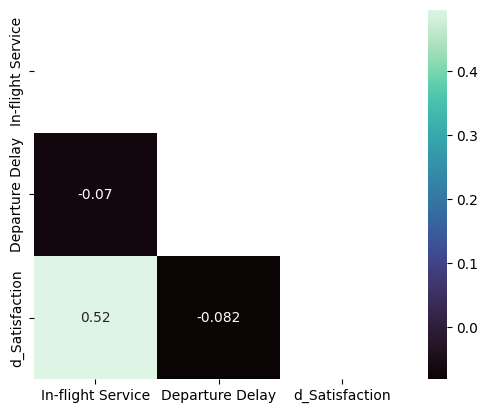

In [407]:
# heatmap of the correlation matrix between in-flight service, departure delays, and satisfaction for long-haul flights only

import seaborn as sns
import numpy as np

corr_arr = df[['In-flight Service', 'Departure Delay', 'd_Satisfaction']].corr()
mask = np.triu(np.ones_like(corr_arr, dtype=bool))
sns.heatmap(corr_arr, annot=True, mask=mask, cmap='mako', square=True, robust=True)

In [408]:
q3_2 = data[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']]

<Axes: >

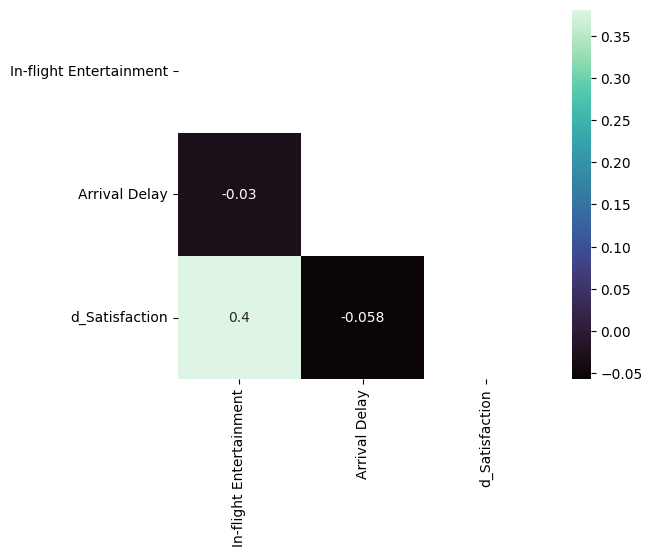

In [409]:
corr_arr_q3 = q3_2.corr()

mask_q3 = np.triu(np.ones_like(corr_arr_q3, dtype=bool))
sns.heatmap(corr_arr_q3, annot=True, mask=mask_q3, cmap='mako', square=True, robust=True)

In [410]:
q3_2[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']].corr('pearson')

,In-flight Entertainment,Arrival Delay,d_Satisfaction
In-flight Entertainment,1.000000,-0.030187,0.398234
Arrival Delay,-0.030187,1.000000,-0.058187
d_Satisfaction,0.398234,-0.058187,1.000000


<Axes: >

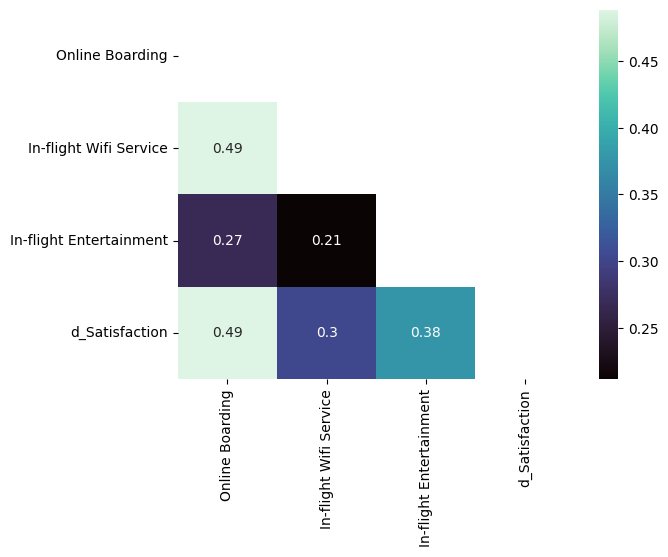

In [411]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(20, 10))
eda_data = data[data['Flight Distance'] < 3000]
eda = eda_data[["Online Boarding", "In-flight Wifi Service", "In-flight Entertainment", "d_Satisfaction"]].corr()
eda_mask = np.triu(np.ones_like(eda, dtype=bool))
sns.heatmap(eda, annot=True, mask=eda_mask, cmap='mako', square=False, robust=True)
# plt.show()

# Question 4

With Gender, Age, Type of travel, Flight distance, Class, Arrival delays, and Overall satisfaction as
attributes, determine association rules with a minimum support of 100 and a minimum confidence of
60%.

In [412]:
from mlxtend.frequent_patterns import apriori, association_rules

feat_data = data[['Gender', 'd_Age', 'Type of Travel', 'd_Flight Distance', 'Class', 'd_Arrival Delay', 'Satisfaction']]

# convert the data into one-hot encoded format
feat_data = pd.get_dummies(feat_data)

# find frequent itemsets with minimum support of 100
# support = 100 / total number of transactions
frequent_itemsets = apriori(feat_data, min_support=100/DATA_SIZE, use_colnames=True)

# generate association rules with minimum confidence of 60%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [413]:
# print the association rules
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business),0.507384,0.690584,0.352587,0.694912,1.006268,0.002196,1.014187,0.012644
1,(Gender_Female),(d_Flight Distance_Medium Haul),0.507384,0.610494,0.309478,0.609949,0.999106,-0.000277,0.998601,-0.001813
2,(Gender_Female),(d_Arrival Delay_Small),0.507384,0.769395,0.390453,0.769541,1.000190,0.000074,1.000635,0.000386
3,(Gender_Male),(Type of Travel_Business),0.492616,0.690584,0.337997,0.686126,0.993545,-0.002196,0.985797,-0.012644
4,(Gender_Male),(d_Flight Distance_Medium Haul),0.492616,0.610494,0.301016,0.611056,1.000921,0.000277,1.001445,0.001813
5,(Gender_Male),(d_Arrival Delay_Small),0.492616,0.769395,0.378942,0.769244,0.999804,-0.000074,0.999346,-0.000386
6,(d_Age_Child),(Type of Travel_Personal),0.057484,0.309416,0.043987,0.765202,2.473050,0.026200,2.941185,0.631969
7,(d_Age_Child),(d_Flight Distance_Medium Haul),0.057484,0.610494,0.038335,0.666890,1.092377,0.003242,1.169300,0.089723
8,(d_Age_Child),(Class_Economy),0.057484,0.448945,0.042624,0.741495,1.651638,0.016817,2.131697,0.418603
9,(d_Age_Child),(d_Arrival Delay_Small),0.057484,0.769395,0.043710,0.760380,0.988284,-0.000518,0.962380,-0.012422


# Question 5

Using PCA (Principal Component Analysis), combine features A10-A23 into a single feature. Let us call it PCAS. Now find average, minimum, and maximum of A10-A23 (computed for each passenger record). Let us call them AVES, MINS, and MAXS, respectively. Convert A24 (overall satisfaction) into a numeric value by converting neutral or unsatisfied to 1.0 and satisfied to 4. Let us call it DA24.

In [414]:
from sklearn.decomposition import PCA

# turn columns Departure and Arrival Time Convenience	Ease of Online Booking	Check-in Service	Online Boarding	Gate Location	On-board Service	Seat Comfort	Leg Room Service	Cleanliness	Food and Drink	In-flight Service	In-flight Wifi Service	In-flight Entertainment	Baggage Handling into one column using PCA and call it PCAS. 
# Then find the average, minimum, and maximum values of PCAS computed for each passenger record.
# Store the values in columns AVES, MINS, and MAXS respectively.
# Convert the satisfaction column to 0 for neutral or unsatisfied and 4 for satisfied and store it in the DA24 column.

pca_data = data[MAIN_FEATURES]

pca = PCA(n_components=1)
pca_data['PCAS'] = pca.fit_transform(pca_data)

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/106175203.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['PCAS'] = pca.fit_transform(pca_data)


In [415]:
pca_data['AVES'] = pca_data.mean(axis=1)
pca_data['MINS'] = pca_data.min(axis=1)
pca_data['MAXS'] = pca_data.max(axis=1)

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3612397148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['AVES'] = pca_data.mean(axis=1)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3612397148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['MINS'] = pca_data.min(axis=1)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3612397148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [416]:
pca_data['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})

pca_data.drop(MAIN_FEATURES, axis=1, inplace=True)

pca_data.head()

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/2407804948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/2407804948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data.drop(MAIN_FEATURES, axis=1, inplace=True)


,PCAS,AVES,MINS,MAXS,DA24
0,-2.793368,3.413775,-2.793368,5.0,0
1,-2.618732,3.358751,-2.618732,5.0,4
2,-2.684487,3.487701,-2.684487,5.0,4
3,-2.623032,3.358465,-2.623032,5.0,4
4,-1.319854,3.178676,-1.319854,5.0,4


In [417]:
# Which among PCAS, AVES, MINS, and MAXS could be used as proxy (or proxies) for DA24? You need to make some runs to answer this question.

In [418]:
pca_2 = PCA(n_components=3)

pca_data_2 = data[MAIN_FEATURES]

pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)

pca_data_2['AVES'] = pca_data_2.mean(axis=1)
pca_data_2['MINS'] = pca_data_2.min(axis=1)
pca_data_2['MAXS'] = pca_data_2.max(axis=1)

pca_data_2['DA24'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 4})

pca_data_2.drop(MAIN_FEATURES, axis=1, inplace=True)



/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3171686620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3171686620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data_2[['PCAS', 'PCAS2', 'PCAS3']] = pca_2.fit_transform(pca_data_2)
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/3171686620.py:5: SettingWithCopyWarning: 
A v

In [419]:
pca_data_2.head()

,PCAS,PCAS2,PCAS3,AVES,MINS,MAXS,DA24
0,-2.793367,1.328074,0.845244,3.139997,-2.793367,5.0,0
1,-2.618732,2.452283,-1.761711,3.004226,-2.618732,5.0,4
2,-2.684481,-1.248262,2.658269,3.160325,-2.684481,5.0,4
3,-2.623032,2.733388,-1.589158,3.030659,-2.623032,5.0,4
4,-1.319850,0.101998,1.684030,2.909775,-1.319850,5.0,4


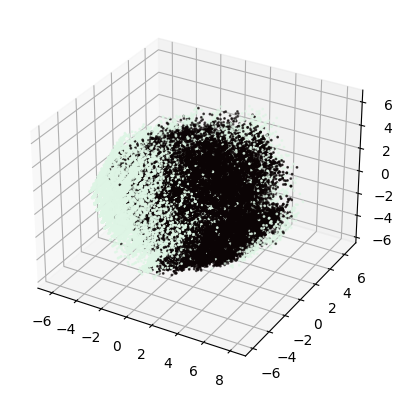

In [420]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_data_2['PCAS'], pca_data_2['PCAS2'], pca_data_2['PCAS3'], c=pca_data_2['DA24'], cmap='mako', s=1)

plt.show()

# Question 6

Using linear regression, model the relationship between (i) flight distance (in miles) and arrival delay (in minutes), and (ii) flight distance (in miles) and departure delay (in minutes). Explain the derived models and their accuracy. State whether such a relationship makes sense based on the derived models.

Arrival Delay = -7.438602294774664e-05 * Flight Distance + 15.179671741642917
R^2 = 3.731960774966403e-06
MSE = 1475.1122550022856
MAE = 20.38674894474579
MAPE = 3.806943520719277e+16
Predicted arrival delay for flight distance of 500 miles: 15.142478730169044
Predicted arrival delay for flight distance of 1000 miles: 15.10528571869517
Predicted arrival delay for flight distance of 2000 miles: 15.030899695747424
Predicted arrival delay for flight distance of 3000 miles: 14.956513672799677


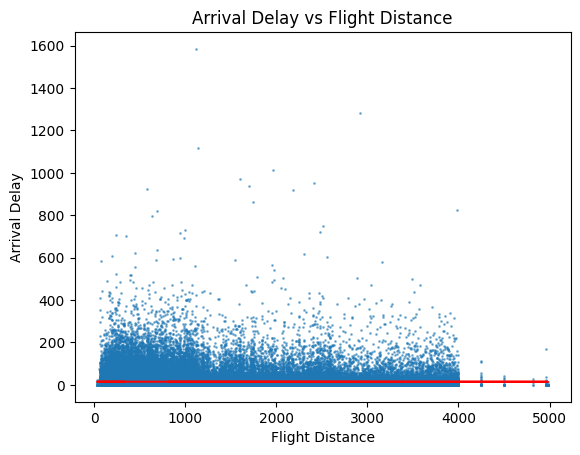

In [421]:
# Using linear regression, model the relationship between (i) flight distance (in miles) and arrival delay (in minutes), and (ii) flight distance (in miles) and departure delay (in minutes). Explain the derived models and their accuracy. State whether such a relationship makes sense based on the derived models.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


lr = LinearRegression()

lr_features = data[['Flight Distance', 'Arrival Delay', 'Departure Delay']]

X = lr_features['Flight Distance'].values.reshape(-1, 1)
y = lr_features['Arrival Delay'].values


# model relationship between flight distance and arrival delay 
lr.fit(X, y)
print('Arrival Delay = {} * Flight Distance + {}'.format(lr.coef_[0], lr.intercept_))
print('R^2 = {}'.format(r2_score(y, lr.predict(X))))
print('MSE = {}'.format(mean_squared_error(y, lr.predict(X))))
print('MAE = {}'.format(mean_absolute_error(y, lr.predict(X))))
print('MAPE = {}'.format(mean_absolute_percentage_error(y, lr.predict(X))))


# predicted arrival delay for flight distance of 1000 miles
print('Predicted arrival delay for flight distance of 500 miles: {}'.format(lr.predict([[500]])[0]))
print('Predicted arrival delay for flight distance of 1000 miles: {}'.format(lr.predict([[1000]])[0]))
print('Predicted arrival delay for flight distance of 2000 miles: {}'.format(lr.predict([[2000]])[0]))
print('Predicted arrival delay for flight distance of 3000 miles: {}'.format(lr.predict([[3000]])[0]))

# plot the model
plt.scatter(X, y, s=1, alpha=0.5)
plt.plot(lr_features['Flight Distance'], lr.predict(X), color='red')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay vs Flight Distance')
plt.show()

Departure Delay = 9.168062434402775e-05 * Flight Distance + 14.604583707847544
R^2 = 5.7696318497280075e-06
MSE = 1449.3911291658874
MAE = 20.155792063408267
MAPE = 3.742249486069915e+16
Predicted Departure delay for flight distance of 500 miles: 14.650424020019559
Predicted Departure delay for flight distance of 1000 miles: 14.696264332191571
Predicted Departure delay for flight distance of 2000 miles: 14.787944956535599
Predicted Departure delay for flight distance of 3000 miles: 14.879625580879628


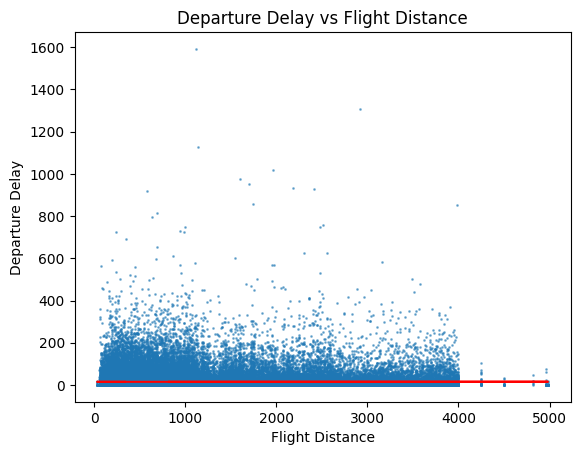

In [422]:
X = lr_features['Flight Distance'].values.reshape(-1, 1)
y = lr_features['Departure Delay'].values

# model relationship between flight distance and Departure delay 
lr.fit(X, y)
print('Departure Delay = {} * Flight Distance + {}'.format(lr.coef_[0], lr.intercept_))
print('R^2 = {}'.format(r2_score(y, lr.predict(X))))
print('MSE = {}'.format(mean_squared_error(y, lr.predict(X))))
print('MAE = {}'.format(mean_absolute_error(y, lr.predict(X))))
print('MAPE = {}'.format(mean_absolute_percentage_error(y, lr.predict(X))))


# predicted Departure delay for flight distance of 1000 miles
print('Predicted Departure delay for flight distance of 500 miles: {}'.format(lr.predict([[500]])[0]))
print('Predicted Departure delay for flight distance of 1000 miles: {}'.format(lr.predict([[1000]])[0]))
print('Predicted Departure delay for flight distance of 2000 miles: {}'.format(lr.predict([[2000]])[0]))
print('Predicted Departure delay for flight distance of 3000 miles: {}'.format(lr.predict([[3000]])[0]))

# plot the model
plt.scatter(lr_features['Flight Distance'], y, s=1, alpha=0.5)
plt.plot(lr_features['Flight Distance'], lr.predict(X), color='red')
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay')
plt.title('Departure Delay vs Flight Distance')
plt.show()

Intercept:  0.3481496509922426
Coefficient:  0.9519210365192436
R2:  0.9222325277279262
Departure Delay = 0.9519210365192436 * Arrival Delay + 0.3481496509922426
Predicted Departure Delay for an Arrival delay of 10 minutes:  9.867360016184678
Predicted Departure Delay for an Arrival delay of 60 minutes:  57.46341184214686


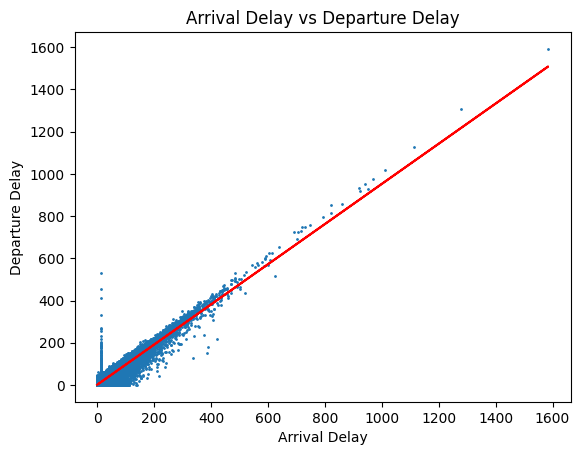

In [423]:
lr.fit(
    lr_features['Arrival Delay'].values.reshape(-1, 1),
    lr_features['Departure Delay'].values
)

print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_[0])
print('R2: ', lr.score(
    lr_features['Arrival Delay'].values.reshape(-1, 1),
    lr_features['Departure Delay'].values
))
print('Departure Delay = {} * Arrival Delay + {}'.format(lr.coef_[0], lr.intercept_))

# Predict the departure delay for an arrival delay of 10 minutes
print('Predicted Departure Delay for an Arrival delay of 10 minutes: ', lr.predict([[10]])[0])
print('Predicted Departure Delay for an Arrival delay of 60 minutes: ', lr.predict([[60]])[0])

# Plot the linear regression line
plt.scatter(lr_features['Arrival Delay'], lr_features['Departure Delay'], s=1)
plt.plot(
    lr_features['Arrival Delay'],
    lr.predict(lr_features['Arrival Delay'].values.reshape(-1, 1)),
    color='red'
)
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

# Question 7

In [424]:
question_7_data = data.copy()

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/2876824789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_corr['n_Type of Travel'] = overall_corr['Type of Travel'].map({'Personal': 0, 'Business': 1})
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_72070/2876824789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_corr.drop('Type of Travel', axis=1, inplace=True)


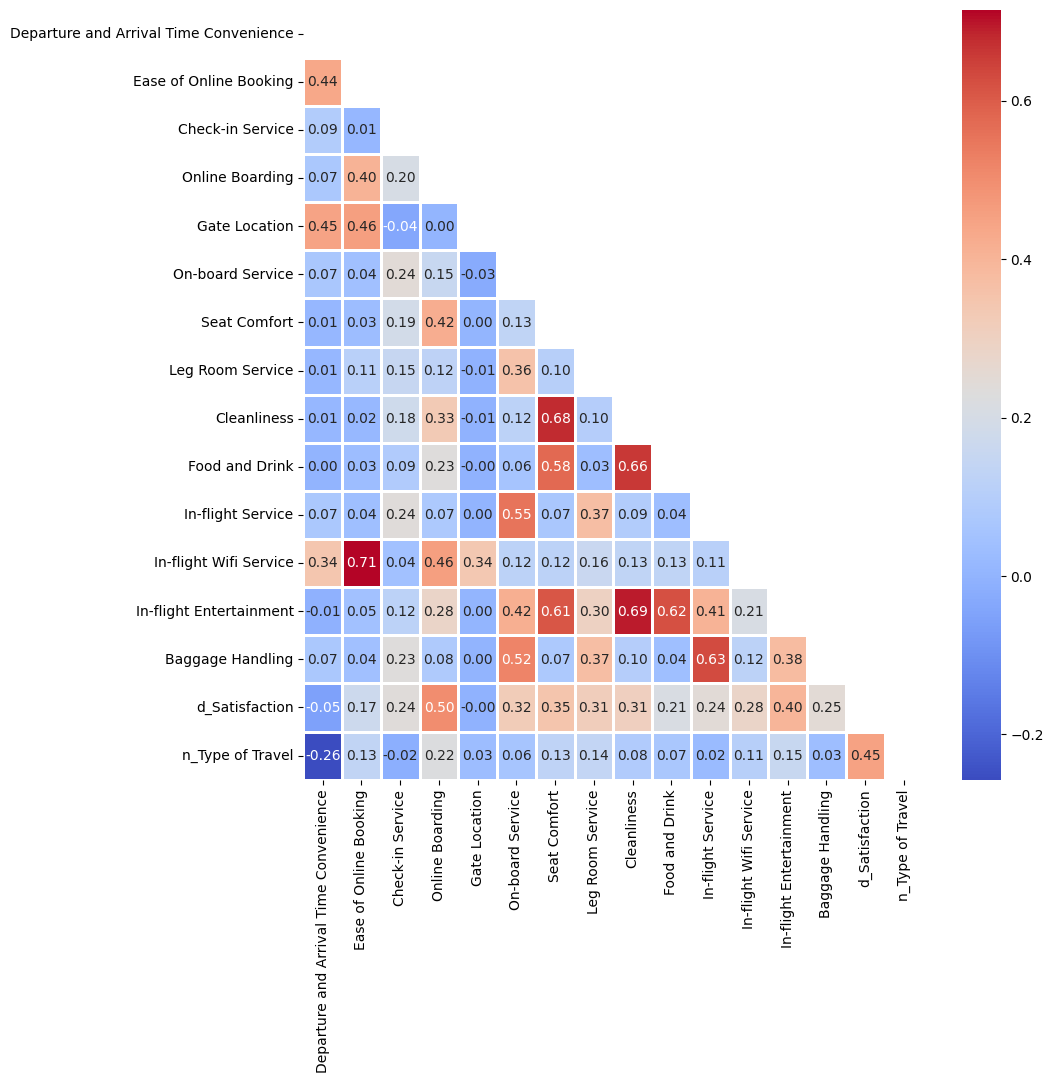

In [425]:
overall_corr = question_7_data[MAIN_FEATURES + ['Type of Travel','d_Satisfaction']]

overall_corr['n_Type of Travel'] = overall_corr['Type of Travel'].map({'Personal': 0, 'Business': 1})

overall_corr.drop('Type of Travel', axis=1, inplace=True)

df_corr = overall_corr.corr()
df_corr_mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, mask=df_corr_mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, linecolor='white')
plt.show()

## Question 7.1
### Is satisfaction with seat comfort related (or depends on) to passenger Gender? 

In [426]:
# Gender vs satisfaction
gender_vs_seat = question_7_data[["Gender","Seat Comfort", "d_Satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="Seat Comfort",ascending=False)
gender_vs_seat.head()

,Gender,Seat Comfort,d_Satisfaction
0,Female,3.481343,0.428975
1,Male,3.400181,0.440115


From the above table we can see that both females, and males rate seat comfort similarly, 3.48 and 3.40 average rating respectively. Furthermore, the gender of the passenger does not impact the overall satisfaction rating given by the passenger as both sexes were satisfied approximately 40% of the time. 

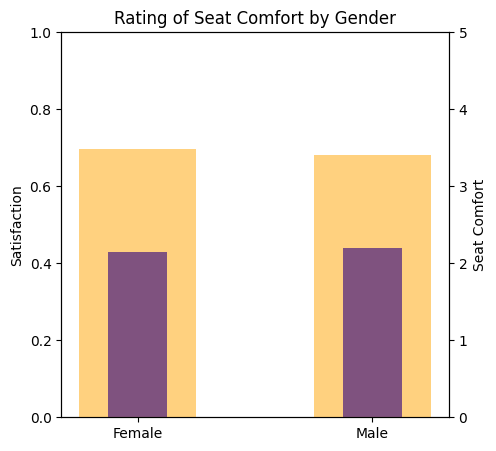

In [427]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(
    data=gender_vs_seat,
    x=gender_vs_seat['Gender'],
    height=gender_vs_seat['d_Satisfaction'],
    width=0.25,
    color='blue',
)

ax.set_ylabel("Satisfaction")
ax.set_ylim(0, 1)

ax2 = ax.twinx()

ax2.bar(
    data=gender_vs_seat,
    x=gender_vs_seat['Gender'],
    height=gender_vs_seat['Seat Comfort'],
    width=0.5,
    color='orange',
    alpha=0.5,
)

ax2.set_ylabel("Seat Comfort")
ax2.set_ylim(0, 5)

plt.title("Rating of Seat Comfort by Gender")
plt.show()

In [428]:
q7_p1 = question_7_data.copy()

q7_p1['d_Gender'] = q7_p1['Gender'].map({
    'Male': 0,
    'Female': 1,
})

q7_p1[['d_Gender', 'Seat Comfort']].corr()

,d_Gender,Seat Comfort
d_Gender,1.000000,0.030756
Seat Comfort,0.030756,1.000000


When directly analyzing the correlation between passenger gender and average seat comfort rating, we are able to see that they have a coefficient value of 0.03 which is considered negligible. This means that there is no correlation between the two variables. If we reference the above heatmap, we can see that Seat Comfort is most closely correlated with the Online Booking experience with a coefficient value of 0.42 which is considered to be a significant correlation.

In [429]:
reg = linregress(
    q7_p1['d_Gender'],
    q7_p1['Seat Comfort'],
)

print(f"R^2: {reg.rvalue**2:.4f}")
print(f"P-value: {reg.pvalue:.4f}")
print(f"std. error: {reg.stderr:.4f}")
print(f"intercept: {reg.intercept:.4f}")
print(f"slope: {reg.slope:.4f}")

R^2: 0.0009
P-value: 0.0000
std. error: 0.0073
intercept: 3.4002
slope: 0.0812


After running Linear Regression analysis on the two target variables (discretized gender, and seat comfort), we found a p-value of _1.4551e-28_, an r-square value of _0.0009_ and a slope of _0.081_. All of which indicates to no significant dependency or correlation between the two variables.

## Question 7.2
### Is satisfaction with gate location related to passenger age?

In [430]:
# Age vs satisfaction
question_7_data[["d_Age","Gate Location", "d_Satisfaction"]].groupby(["d_Age"],as_index=False).mean().sort_values(by="Gate Location",ascending=False)

,d_Age,Gate Location,d_Satisfaction
4,Senior,3.019710,0.296680
2,Middle Age,2.987231,0.547066
1,Youth,2.978816,0.356512
3,Old,2.951415,0.401674
0,Child,2.951112,0.146263


From the above table we are able to see that the Senior age group rated Gate Location highest out of all age groups, while the Child age group rated Gate Location lowest out of all age groups. This could be due to the fact that the Child age group is more interested in the in-flight entertainment and food options, rather than the Gate Location.

Something interesting to note about the above table is the fact that the overall satisfaction of the Senior age group is around 29%, making it the second lowest overall satisfaction out of all age groups. It is clear that the airline is failing to meet the expectations of the Senior age group in areas other than Gate Location.

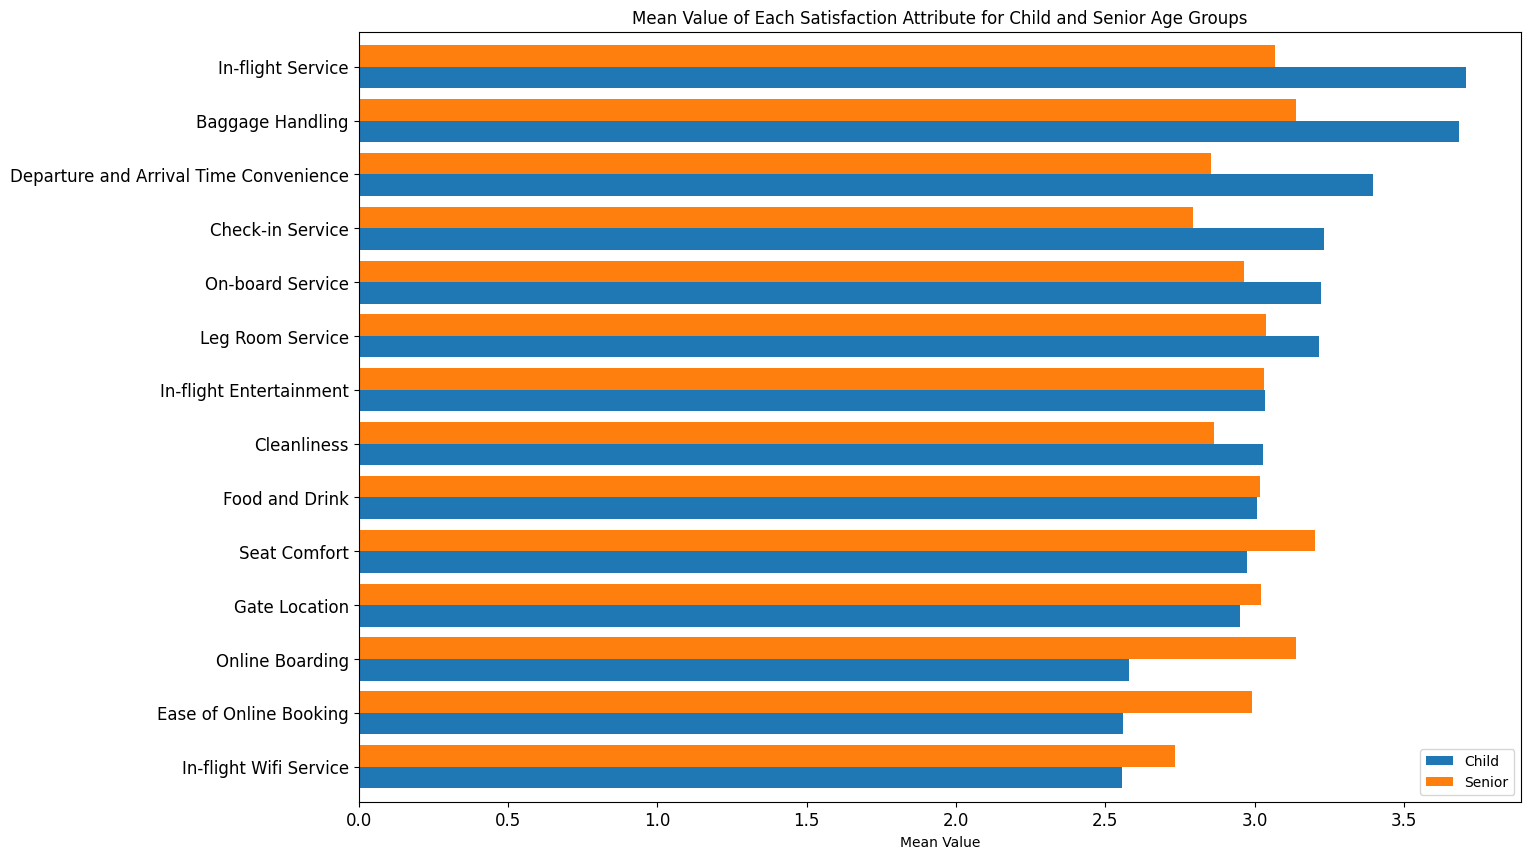

In [431]:
child_data = data[MAIN_FEATURES][data['d_Age'] == 'Child']
senior_data = data[MAIN_FEATURES][data['d_Age'] == 'Senior']
child_data_mean = child_data.mean().sort_values(ascending=True)
senior_data_mean = senior_data.mean().sort_values(ascending=True)

age_group_mean = pd.concat([child_data_mean, senior_data_mean], axis=1)

age_group_mean.columns = ['Child', 'Senior']

age_group_mean.plot(kind='barh', figsize=(15, 10), title='Mean Value of Each Satisfaction Attribute for Child and Senior Age Groups', fontsize=12, legend=True, width=0.8, xlabel='Mean Value')
plt.show()

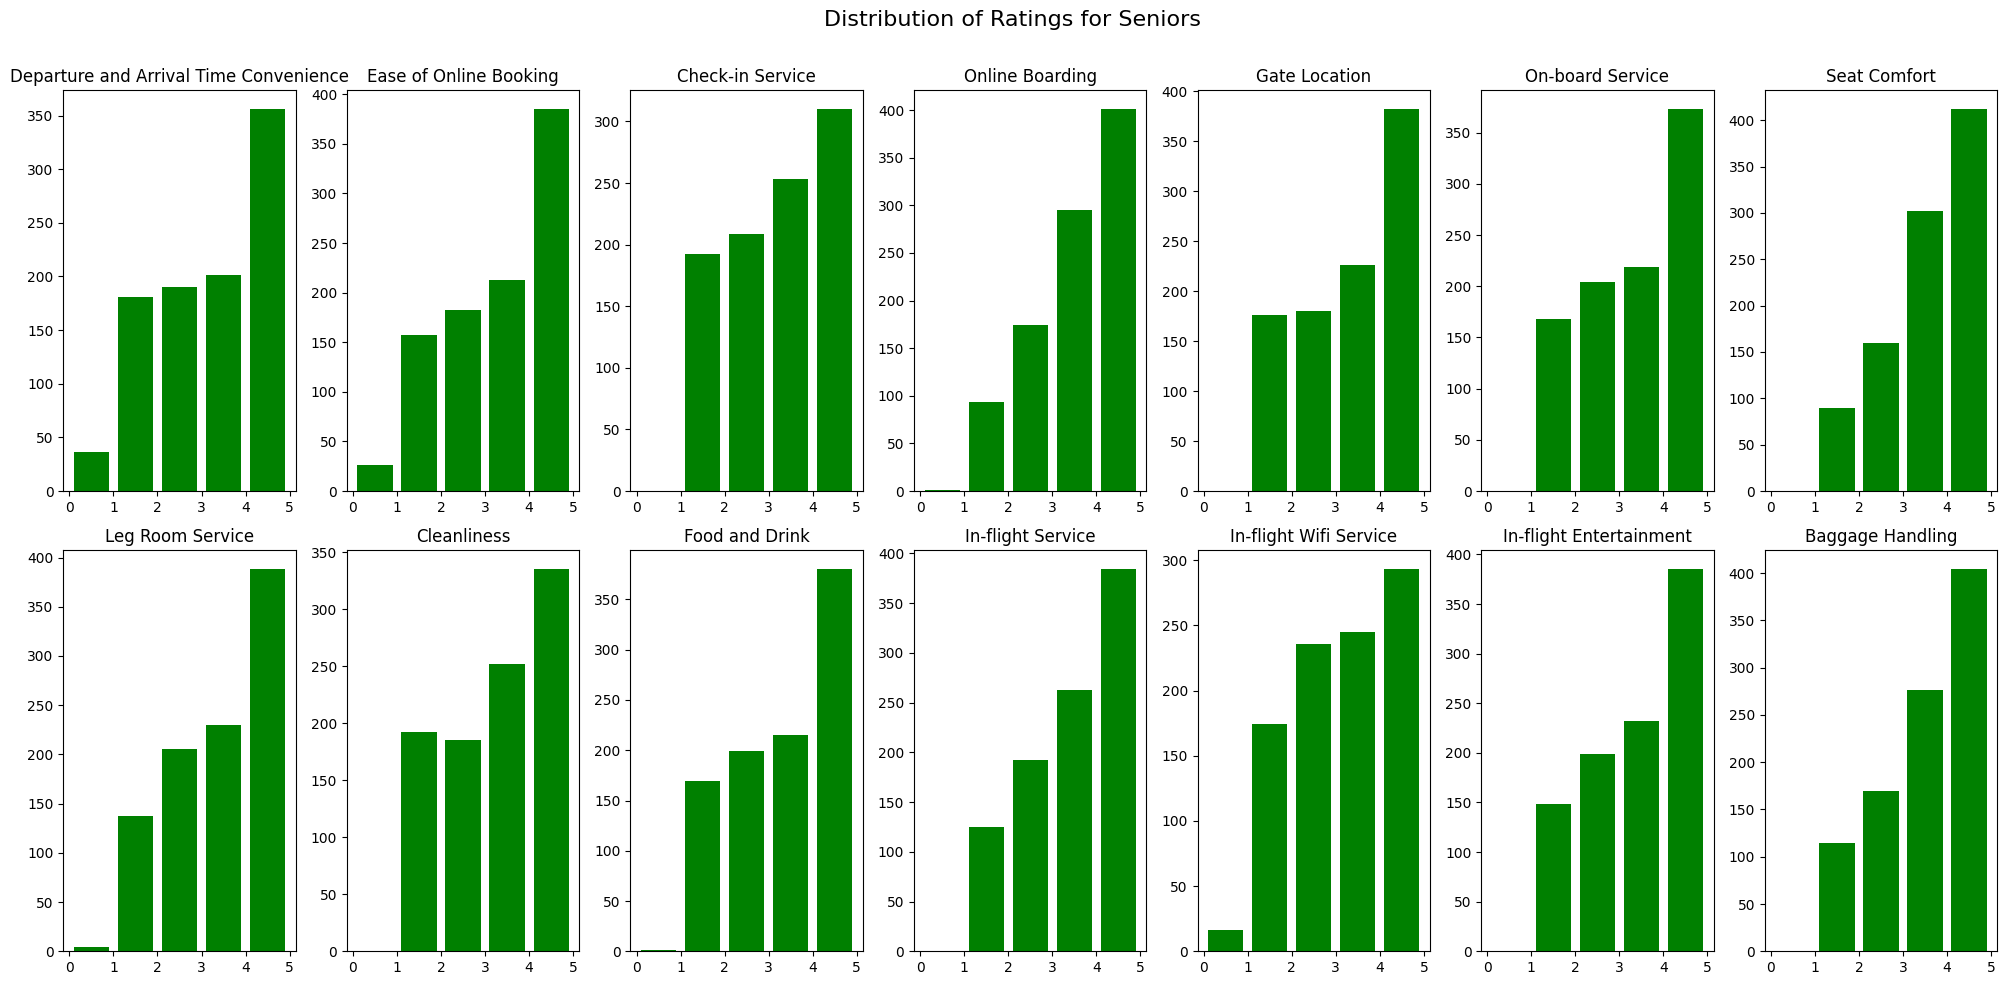

In [432]:
# create a histogram of the distribution of the ratings between 0 and 5 for all 14 MAIN FEATURES for the senior age group only using a subplot for each feature

fig, ax = plt.subplots(2, 7, figsize=(20, 10))

for i, feature in enumerate(MAIN_FEATURES):
    ax[i//7, i%7].hist(senior_data[feature], bins=5, range=(0, 5), rwidth=0.8, color='green', align='mid')
    ax[i//7, i%7].set_title(feature)
    ax[i//7, i%7].set_xticks([0, 1, 2, 3, 4, 5])


fig.suptitle('Distribution of Ratings for Seniors', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

To investigate the differences between the Senior and Child age group's satisfaction further, we can look at the distribution of each satisfaction attribute for the Senior age group. We can see that the Senior age group skews towards a satisfied customers (5 rating), in each area of satisfaction. From this same distribution we can see that the most dissatisfied area for the Senior age group is the Departure and Arrival time Convenience, where the airline received almost 50 0 ratings, just behind the number of 0 ratings for the Ease of Online Booking.

In [433]:
q7_p2 = question_7_data.copy()

q7_p2['num_d_Age'] = q7_p2['d_Age'].map({
    'Child': 0,
    'Youth': 1,
    'Middle Age': 2,
    'Old': 3,
    'Senior': 4
})

q7_p2[['num_d_Age', 'Gate Location']].corr()

,num_d_Age,Gate Location
num_d_Age,1.000000,-0.000982
Gate Location,-0.000982,1.000000


In an effort to see any relationship between the passenger's age and the Gate Location rating received, we calculated the correlation coefficient between the two variables, which resulted in a value of _-0.000982_. This value is very close to zero, which indicates that there is no relationship between the two variables. This is also supported by the linear least-squares regression line, which has a slope of _-3.3661e-05_ and a y-intercept of _2.9782_. The slope is very close to zero, which indicates that there is no relationship between the two variables resulting in a nearly horizontal regression line.

In [434]:
linregress(
    q7_p2['Age'],
    q7_p2['Gate Location']
)

LinregressResult(slope=-3.366198655380456e-05, intercept=2.9782520770552, rvalue=-0.000398075760800024, pvalue=0.8859264081547357, stderr=0.00023464223020440463, intercept_stderr=0.009908341686533163)

## Question 7.3
### Do first time passengers have more or less expectations than returning customers measured in terms of overall satisfaction?

In [435]:
# Customer Type vs satisfaction
question_7_data[["Customer Type", "d_Satisfaction"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="d_Satisfaction",ascending=False)

,Customer Type,d_Satisfaction
1,Returning,0.478115
0,First-time,0.239697


First time passengers have more expectations than returning customers, when measured in overall satisfaction. We can see that only 23% of first time passengers are satisfied with the services provided while 47% of returning customers are satisfied. This huge difference could be due to the returning customers being used to the services provided by the airline and therefore having lower expectations.

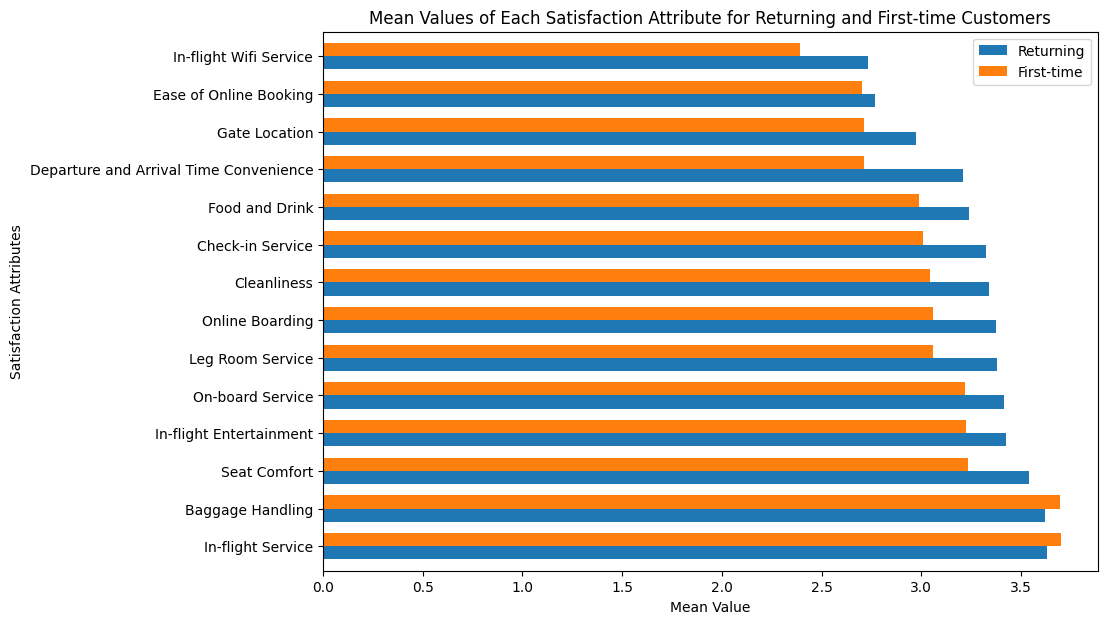

In [436]:
ret_cust = question_7_data[question_7_data['Customer Type'] == 'Returning']

ret_cust_data = ret_cust[MAIN_FEATURES]

ret_cust_mean = ret_cust_data.mean().sort_values(ascending=False)

first_cust = question_7_data[question_7_data['Customer Type'] == 'First-time']

first_cust_data = first_cust[MAIN_FEATURES]

first_cust_mean = first_cust_data.mean().sort_values(ascending=False)

# plot mean values on the same horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))

width = 0.35
ind = np.arange(len(ret_cust_mean))
ax.barh(ind, ret_cust_mean, width, label='Returning', align='edge')
ax.barh(ind + width, first_cust_mean, width, label='First-time', align='edge')

ax.set(yticks=ind + width, yticklabels=ret_cust_mean.index, ylim=[2*width - 1, len(ret_cust_mean)])

ax.set_title('Mean Values of Each Satisfaction Attribute for Returning and First-time Customers')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Satisfaction Attributes')
ax.legend()
plt.show()

It seems as both First time and Returning customers are most dissatisfied with the in-flight wifi service by a large margin, followed by the ease of online booking. As these two groups cover the entire population, it is safe to say that the in-flight wifi service and the ease of online booking are the two most important factors that need to be improved in order to increase customer satisfaction. 

In [437]:
q7_p3_1 = question_7_data[['In-flight Wifi Service', 'd_Satisfaction', 'Customer Type']]
q7_p3_1.groupby('Customer Type', as_index=True).corr()

In-flight Wifi Service  d_Satisfaction
Customer Type                                                               
First-time    In-flight Wifi Service                1.000000        0.434966
              d_Satisfaction                        0.434966        1.000000
Returning     In-flight Wifi Service                1.000000        0.260155
              d_Satisfaction                        0.260155        1.000000

In [438]:
q7_p3_2 = question_7_data[['Ease of Online Booking', 'd_Satisfaction', 'Customer Type']]
q7_p3_2.groupby('Customer Type', as_index=True).corr()

Ease of Online Booking  d_Satisfaction
Customer Type                                                               
First-time    Ease of Online Booking                1.000000        0.411595
              d_Satisfaction                        0.411595        1.000000
Returning     Ease of Online Booking                1.000000        0.124623
              d_Satisfaction                        0.124623        1.000000

In an effort to further investigate the relationship between customer types and overall satisfaction, the above three tables were generated. As we can see, First time customers' overall satisfaction is moderately correlated (_0.43_ correlation coefficient) with their satisfaction with the in-flight wifi service, unlike returning customers (_0.26_ correlation coefficient). This means that the overall satisfaction of first time customers are influences much more by their satisfaction with the in-flight wifi service than returning customers. 

This same trend continues with the Ease of Online booking service where first time customers have a correlation coefficient of _0.41_ and returning customers have a correlation coefficient of _0.12_, which again proves that first time customers are more influenced by the Ease of Online booking service than returning customers.

## Question 7.4
### Is there a distinct (statistically significant) difference between business and personal travelers in terms of their reaction to their flights? 
_(Hint: Use any attribute(s) that you think appropriate to measure their reaction.)_

In [439]:
feats = MAIN_FEATURES + ["Type of Travel", "d_Satisfaction"]

# Customer Type vs satisfaction
viz_q7 = question_7_data[feats].groupby(["Type of Travel"],as_index=False).mean().sort_values(by="d_Satisfaction",ascending=False)
viz_q7.head()

,Type of Travel,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,d_Satisfaction
0,Business,2.794856,2.882678,3.292498,3.455175,3.002486,3.434538,3.554146,3.473883,3.360730,3.266186,3.660732,2.822896,3.494643,3.658190,0.583724
1,Personal,3.644014,2.476099,3.337000,2.800582,2.919875,3.268047,3.189638,3.076343,3.120263,3.067708,3.600816,2.518451,3.053276,3.573917,0.101326


Satisfaction of Business passengers (58%) is much higher then Personal travelers (10%). The biggest dissatisfaction among Business passengers is with the Departure and Arrival Time Convenience, where the average rating is 2.79 and 3.64 for Personal travelers.

In [440]:
q7_p4 = overall_corr.copy()

In [441]:
q7_p4[['n_Type of Travel', 'd_Satisfaction']].corr()

,n_Type of Travel,d_Satisfaction
n_Type of Travel,1.000000,0.449861
d_Satisfaction,0.449861,1.000000


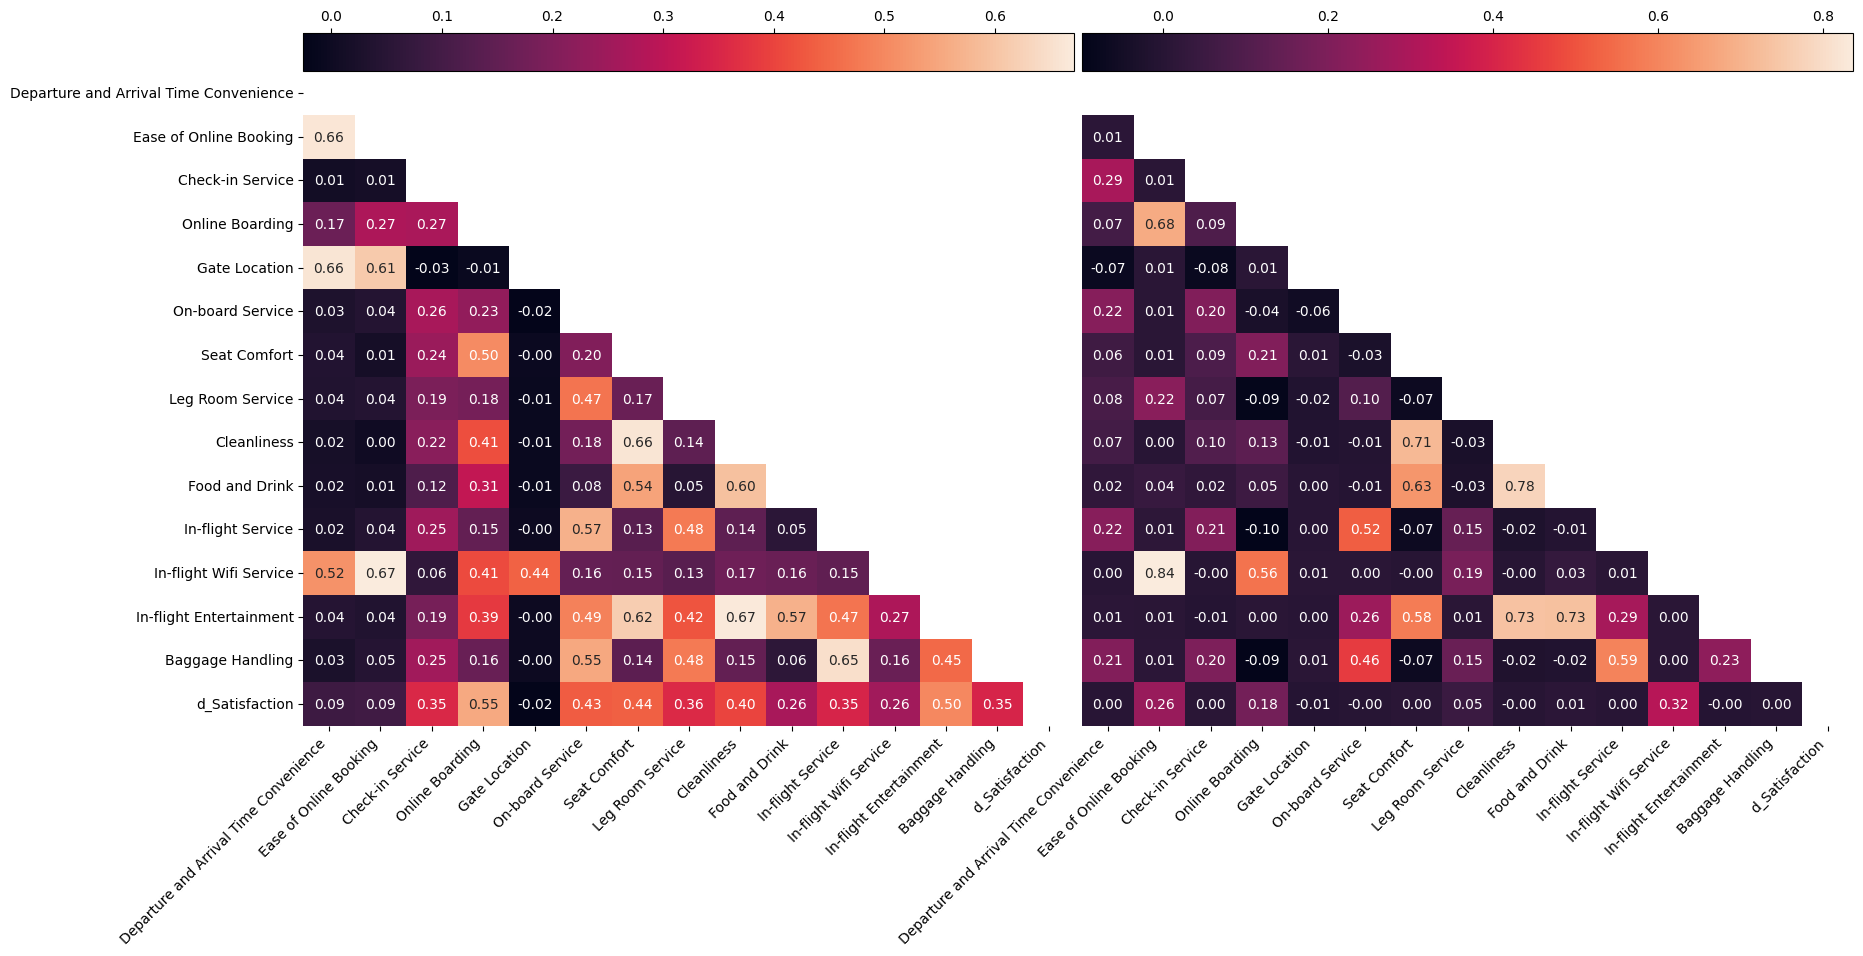

In [610]:
question_7_data[feats].head()

feat_corr_q7_p4 = question_7_data[feats]

business_q7_p4 = feat_corr_q7_p4[feat_corr_q7_p4['Type of Travel'] == 'Business']
personal_q7_p4 = feat_corr_q7_p4[feat_corr_q7_p4['Type of Travel'] == 'Personal']

business_q7_p4 = business_q7_p4.drop(['Type of Travel'], axis=1)
personal_q7_p4 = personal_q7_p4.drop(['Type of Travel'], axis=1)

business_q7_p4_corr = business_q7_p4.corr()
business_q7_p4_corr_mask = np.triu(np.ones_like(business_q7_p4_corr, dtype=bool))

personal_q7_p4_corr = personal_q7_p4.corr()
personal_q7_p4_corr_mask = np.triu(np.ones_like(personal_q7_p4_corr, dtype=bool))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(business_q7_p4_corr, annot=True, ax=ax[0], fmt='.2f', mask=business_q7_p4_corr_mask, cbar=False)
sns.heatmap(personal_q7_p4_corr, annot=True, ax=ax[1], fmt='.2f', mask=personal_q7_p4_corr_mask, cbar=False)

ax[0].set_title('Business Type of Travel')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].set_title('Personal Type of Travel')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_yticks([])

fig.subplots_adjust(wspace=0.01)
fig.colorbar(ax[0].collections[0], ax=ax[0], location='top', use_gridspec=False, pad=0)
fig.colorbar(ax[1].collections[0], ax=ax[1], location='top', use_gridspec=False, pad=0)

plt.show()

In [487]:
business_q7_p4_corr[(business_q7_p4_corr >= 0.7) & (business_q7_p4_corr < 1)].count().sum()

0

In [488]:
personal_q7_p4_corr[(personal_q7_p4_corr >= 0.7) & (personal_q7_p4_corr < 1)].count().sum()

10

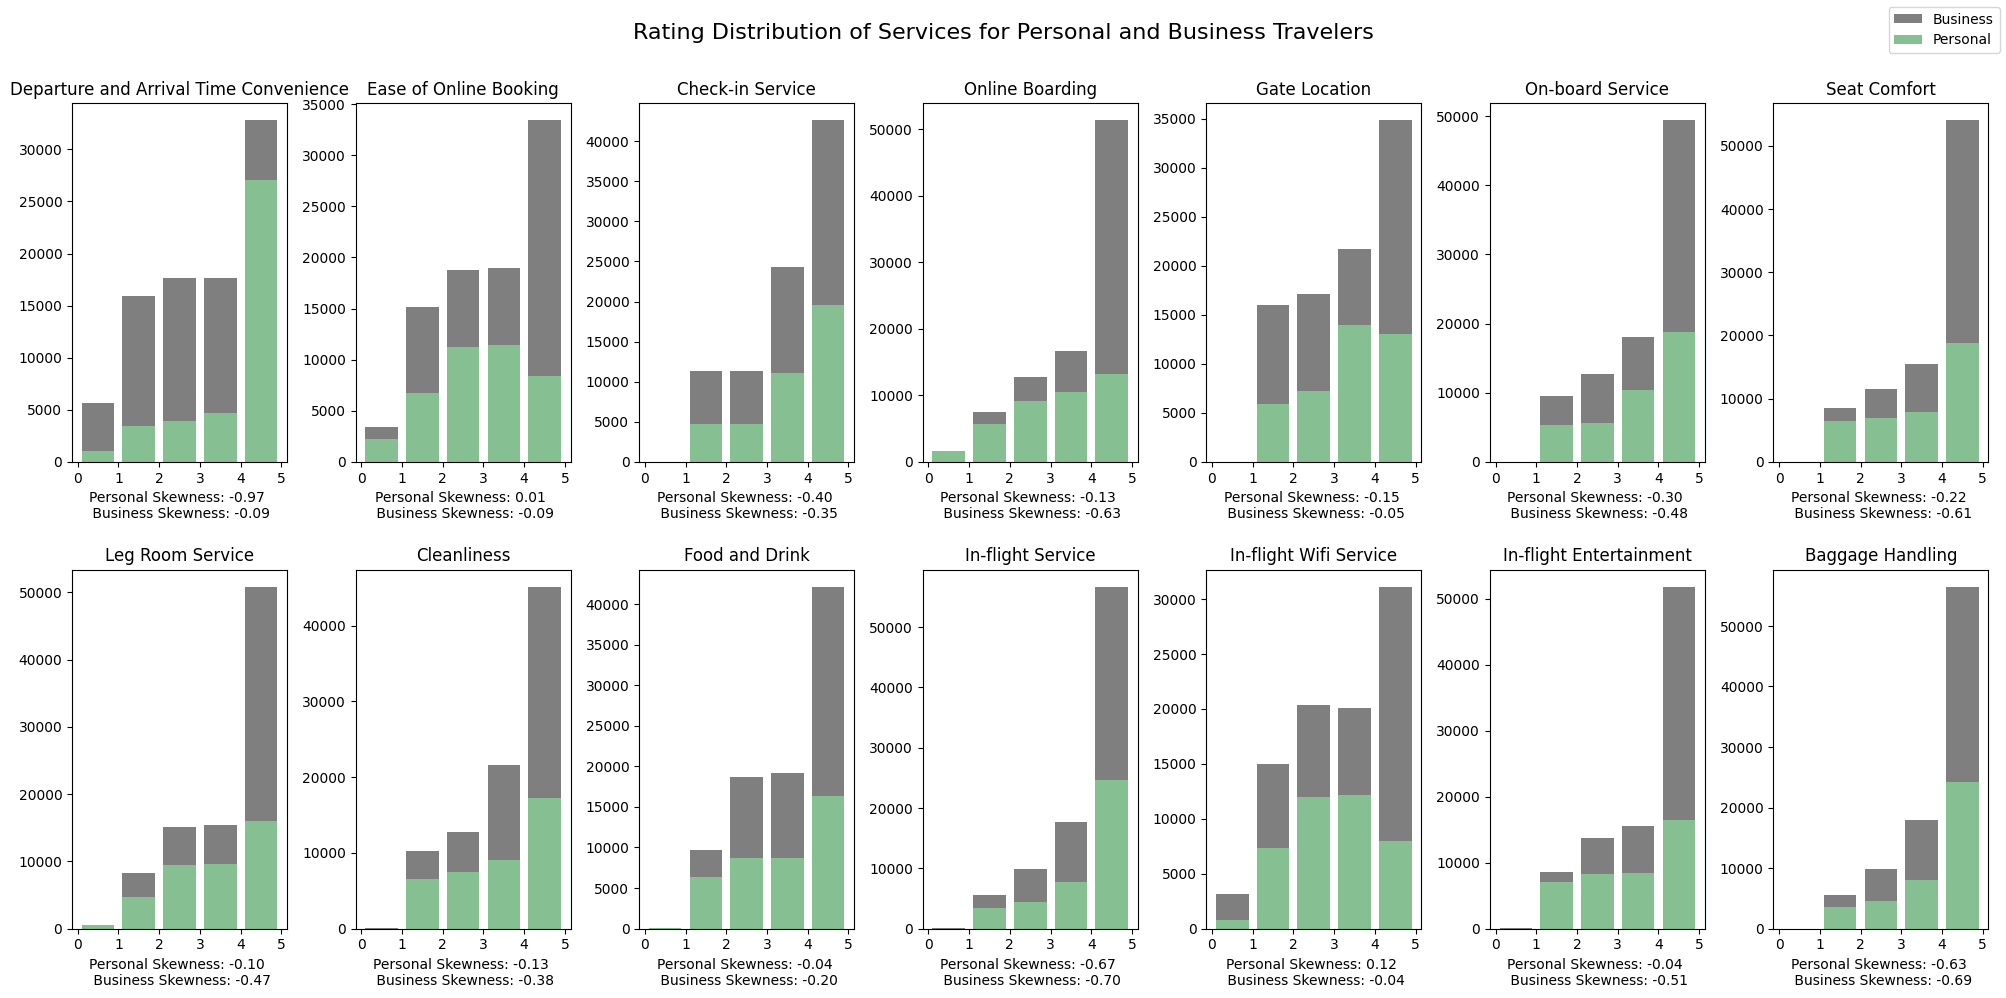

In [557]:
fig, ax = plt.subplots(2, 7, figsize=(20, 10))

for i, feature in enumerate(MAIN_FEATURES):
    ax[i//7, i%7].hist(business_q7_p4[feature], bins=5, range=(0, 5), rwidth=0.8, color='black', align='mid', alpha=0.5)
    ax[i//7, i%7].hist(personal_q7_p4[feature], bins=5, range=(0, 5), rwidth=0.8, color='#86bf91', align='mid')
    ax[i//7, i%7].set_title(feature)
    ax[i//7, i%7].set_xlabel("Personal Skewness: %.2f \n Business Skewness: %.2f" % (personal_q7_p4[feature].skew(), business_q7_p4[feature].skew()))
    ax[i//7, i%7].set_xticks([0, 1, 2, 3, 4, 5])


fig.suptitle('Rating Distribution of Services for Personal and Business Travelers', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace=0.3)
fig.legend(['Business', 'Personal'], loc='upper right')
plt.show()

In [508]:
personal_q7_p4.skew().sort_values(ascending=False)

d_Satisfaction                            2.642419
In-flight Wifi Service                    0.115092
Ease of Online Booking                    0.011635
In-flight Entertainment                  -0.042002
Food and Drink                           -0.043796
Leg Room Service                         -0.097911
Online Boarding                          -0.125353
Cleanliness                              -0.125551
Gate Location                            -0.150464
Seat Comfort                             -0.215243
On-board Service                         -0.303603
Check-in Service                         -0.395705
Baggage Handling                         -0.633740
In-flight Service                        -0.670150
Departure and Arrival Time Convenience   -0.968366
dtype: float64

In [512]:
business_q7_p4.skew().sort_values(ascending=False).head(15)

In-flight Wifi Service                   -0.044371
Gate Location                            -0.047311
Ease of Online Booking                   -0.092219
Departure and Arrival Time Convenience   -0.094747
Food and Drink                           -0.200264
d_Satisfaction                           -0.339700
Check-in Service                         -0.353422
Cleanliness                              -0.376799
Leg Room Service                         -0.467935
On-board Service                         -0.476019
In-flight Entertainment                  -0.511949
Seat Comfort                             -0.608252
Online Boarding                          -0.632429
Baggage Handling                         -0.692312
In-flight Service                        -0.697289
dtype: float64

In [516]:
len(business_q7_p4)

89693

In [560]:
len(personal_q7_p4)

40187

From the above concatenated heatmap, we can clearly see the difference in the correlation between the features by each passenger travel type. Some interesting observations could be seen on the Personal traveler plot when we look at the d_Satisfaction row (last row), where the highest value is _0.32_ meaning the highest overall correlation between any service provided by the airline and the passenger satisfaction is the _In-flight wifi service_. In comparison, Business type travelers have the highest correlation between overall satisfaction and _online boarding_ with a value of _0.55_. While the highest correlation between overall satisfaction and all services is larger for business travelers, there is less number of correlations that are larger than 0.7. There is exactly 10 services that have a correlation larger than _0.7_ while the business travelers have _0_. 

To investigate this pattern in the data, observations were made on the skewness of both type of passengers, and as expected the business travelers have a higher skewness than the personal travelers. This means that the business passengers are much more likely to vote in an extreme way on both sides of the scale. For example, when comparing the distribution of ratings for the in-flight entertainment service between the two types of travelers, we can see that over 40,000 business travelers rated the service as 5 forming a massively skewed distribution, while personal travelers have a very uniform distribution. When looking at the numbers of the service, we observed a skewness of _-0.511949_ for the business travelers and a skewness of _-0.042002_ for personal travelers. The closer the skewness is to 0, the more uniform the distribution of ratings are across the traveler group. 

This level of skewness could also be explained due to the difference in the number of Personal to Business travelers. The number of personal travelers is _40,187_ while the number of business travelers is _89,693_. This means that the there is a much higher noise that could be introduced to the data since the sample size is over twice as large. This shouldn't undermine the importance of the difference between the overall satisfaction between the two types of travelers, which indicates that business travelers are 48% more likely to be satisfied than personal travelers. 

In [568]:
count = [c[0] for c in question_7_data[['Type of Travel', 'd_Satisfaction']].groupby(['Type of Travel']).count().values.tolist()]

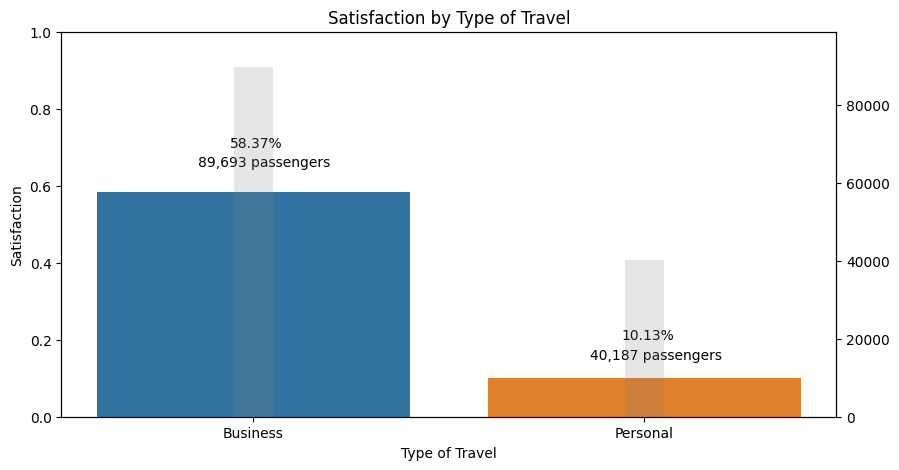

In [569]:
fig, axs = plt.subplots(
    figsize=(10, 5),
)

axs = sns.barplot(
    data=viz_q7,
    x='Type of Travel',
    y='d_Satisfaction',
)

axs.set_xlabel('Type of Travel')
axs.set_ylabel('Satisfaction')
axs.set_ylim(0, 1)


axs.text(
    x=-0.06,
    y=0.70,
    s="{}%".format(viz_q7['d_Satisfaction'][0].round(4) * 100),
)
axs.text(
    x=-0.14,
    y=0.65,
    s="{:,} passengers".format(count[0]),
)
axs.text(
    x=0.94,
    y=0.20,
    s="{}%".format(viz_q7['d_Satisfaction'][1].round(4) * 100),
)
axs.text(
    x=0.86,
    y=0.15,
    s="{:,} passengers".format(count[1]),
)

ax2 = axs.twinx()

ax2.set_ylim(0, np.max(count) * 1.1)

ax2.bar(
    data=viz_q7,
    x='Type of Travel',
    height=count,
    width=0.1,
    color='grey',
    alpha=0.2,
)


plt.title('Satisfaction by Type of Travel')
plt.show()

From the above plot we can observe that there are more than 2.2 times as many Business travelers than Personal travelers, and there is a 48% difference between the satisfaction of the two groups. This is a significant difference, and we can conclude that there is an observable relationship between the type of travel and the satisfaction of the customer.

## Question 7.5
### Is there a distinct (statistically significant) difference between business class passengers and economy passengers in terms of their reaction to satisfaction with food-and-drink?  

In [563]:
# Class vs satisfaction with food and drink
class_viz = question_7_data[["Class", "Food and Drink" ,"d_Satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="Food and Drink",ascending=False)
class_viz.head()

,Class,Food and Drink,d_Satisfaction
0,Business,3.329955,0.694434
2,Economy Plus,3.110403,0.246414
1,Economy,3.086556,0.187673


In [613]:
question_7_data[["Class", "Food and Drink" ,"d_Satisfaction"]].groupby(["Class"],as_index=False).corr()

Food and Drink  d_Satisfaction
0 Food and Drink        1.000000        0.226343
  d_Satisfaction        0.226343        1.000000
1 Food and Drink        1.000000        0.144025
  d_Satisfaction        0.144025        1.000000
2 Food and Drink        1.000000        0.259686
  d_Satisfaction        0.259686        1.000000

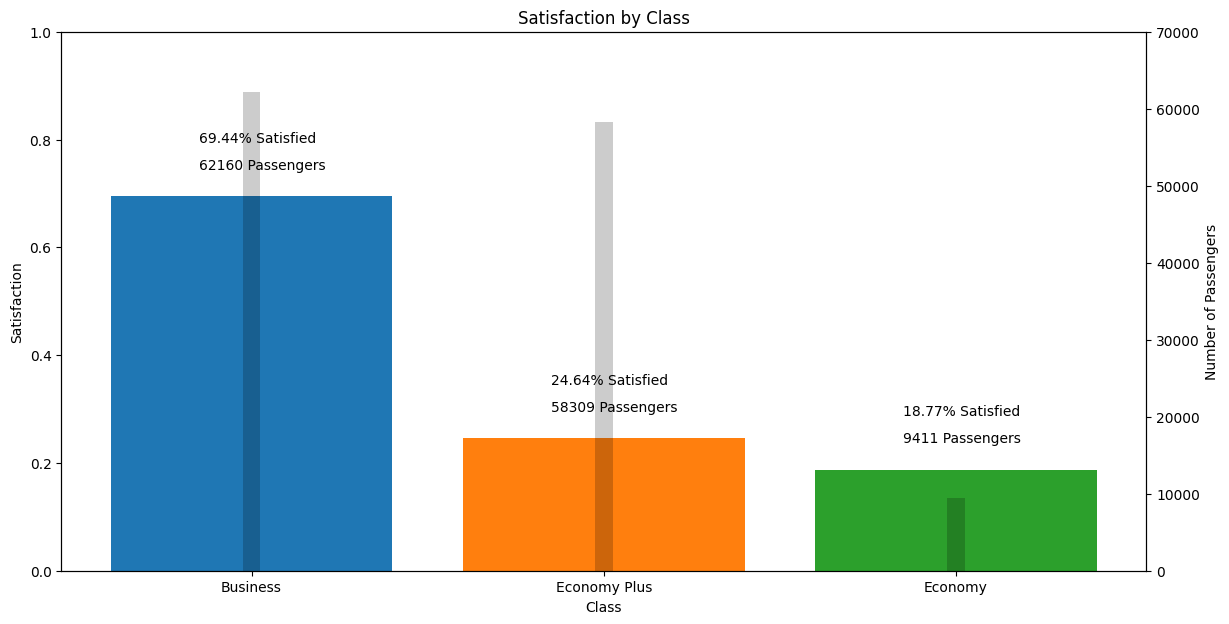

In [564]:
# store the number of instances for each class in an array
count = [c[0] for c in question_7_data[['Class', 'd_Satisfaction']].groupby(['Class']).count().values.tolist()]

fig, axs = plt.subplots(
    figsize=(14, 7),
)

axs.bar(
    x=class_viz['Class'],
    height=class_viz['d_Satisfaction'],
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
)
axs.set_xlabel('Class')
axs.set_ylabel('Satisfaction')
axs.set_ylim(0, 1)

ax2 = axs.twinx()

ax2.bar(
    x=class_viz['Class'],
    height=count,
    width=0.05,
    color='black',
    alpha=0.2,
)
ax2.set_ylabel('Number of Passengers')
ax2.set_ylim(0, 70000)

axs.text(
    x=-0.15,
    y=class_viz['d_Satisfaction'].values[0] + 0.1,
    s="{}% Satisfied".format(class_viz['d_Satisfaction'].values[0].round(4) * 100),
)
axs.text(
    x=-0.15,
    y=class_viz['d_Satisfaction'].values[0] + 0.05,
    s="{} Passengers".format(count[0]),
)
axs.text(
    x=0.85,
    y=class_viz['d_Satisfaction'].values[1] + 0.1,
    s="{}% Satisfied".format(class_viz['d_Satisfaction'].values[1].round(4) * 100),
)
axs.text(
    x=0.85,
    y=class_viz['d_Satisfaction'].values[1] + 0.05,
    s="{} Passengers".format(count[1]),
)
axs.text(
    x=1.85,
    y=class_viz['d_Satisfaction'].values[2] + 0.1,
    s="{}% Satisfied".format(class_viz['d_Satisfaction'].values[2].round(4) * 100),
)
axs.text(
    x=1.85,
    y=class_viz['d_Satisfaction'].values[2] + 0.05,
    s="{} Passengers".format(count[2]),
)
plt.title('Satisfaction by Class')
plt.show()

From the above comparison between airline classes and overall satisfaction, we can see that the overwhelming majority (69%) of Business class travelers are satisfied with their flight experience, while only 18% of Economy travelers are satisfied with the services offered by the airline. 

Something even more staggering is that there was only 7% more Business class passengers than Economy Plus, yet there was a 45% difference in satisfaction between the two classes. From this, we can conclude that the airline should focus on improving the experience of Economy Plus passengers, as they are significantly lacking in satisfaction compared to the Business class while also making up almost the same amount of passengers.

# Question 8